# Algorithmic Data Science : Week 3 (Unit 2) lab

## Investigating the run-time of sorting algorithms

We have claimed that the run-time of the insertion_sort algorithm is given by:

$$c_a n^2$$

for a fixed constant $c_a$ when the length $n$ of the list is large. This is an empirical claim, i.e., something which can be verified.  

1) Obtain code for the algorithm (from the lecture notes) and plot the run-time for lists of different lengths (via code from last week's lab). 




In [1]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def insertion_sort(alist):
    for index in range(1, len(alist)):
        item=alist[index] # next value
        sofar = index-1 # previous index
        while sofar > -1 and alist[sofar] > item: # if the previous value is more than the next 
            alist[sofar+1]=alist[sofar] # set the next value as the previous value
            sofar -= 1
        alist[sofar+1]=item # set the previous value as the the next
    return alist

In [3]:
def make_rand_list(n):
    result=[]
    while n >0:
        result.append(random.randint(1,100))
        n-=1
    return result

In [4]:
def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

In [34]:
xs=[]
ys=[]

for i in range(0,5000,10):
    if i == 0:
        pass
    else:
        _l = make_rand_list(i)
        (y,z)=timeit(insertion_sort, _l, repeats=100)
        xs.append(i)
        ys.append(y)

Text(0.5, 1.0, 'Average length of time to generate lists of different lengths')

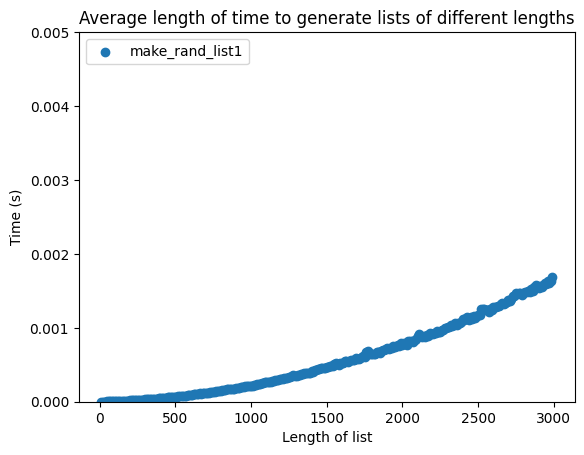

In [33]:
plt.scatter(xs,ys,label='make_rand_list1')
plt.ylim(0,0.005)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')

2) How can we know we have a quadratic curve $y=c_a x^2$ for insertion_sort and not a curve of $x$ to some other power, $y=c_a x^\alpha$? For this more general case, taking logs of both sides of the equation gives:
$$\log(y) = \log(c_a) + \alpha \log(x)$$
So if we plot the log of the time taken against the log of the length of the list - assuming the function is indeed of the form $y=c_a x^\alpha$, the log-log plot will give us a straight line, and the gradient of this straight line will be $\alpha$ and the $y$ intercept will be $\log(c_a)$.

Create this log-log plot.

3) Can you estimate the constant $c_a$ for your computer? Compare your value of $c_a$ with those of other students. 

(Tip: First estimate the gradient and intercept of the log-log plot using a function from a stats library, and then use that line fit to derive $c_a$. A good choice is the *linregress* function from the library *scipy.stats*. Import the library. Then see how to run the *linregress* function by Googling *scipy.stats.linregress* and reading the documentation for this function.)



4) What value do you get for $\alpha$? If you find $\alpha$ is not that close to 2, it's because the lists you're considering are not long enough for the time complexity to be behaving the way it does asymptotically for large $n$. See what happens to $\alpha$ if you do a plot using longer lists. Do you end up eventually with a value close to 2?

5) Recall that the official time complexity should be derived using the worst case scenario. Did you think to use lists that lead to the worst case scenario? If you did plots just based on completely random lists, then you were obtaining average scenarios. Can you do the worst case scenario and the best case scenario? How do these and the average scenario differ?

6) (Optional.) How accurate can you make your estimate of $c_a$?  What is the standard deviation / error in your measurements? (Tip: The linear regression function you used has the ability to give you the standard error for the estimates of the slope and intercept.)



7) Repeat your experiments while your computer is heavily loaded (e.g. running some video processing in the background), and compare the results.

(Optional.) Now repeat the whole exercise for the merge_sort algorithm, which we theoretically expect to run in

$$c_bn\log(n)$$

for a fixed constant $c_b$ when the length of the list is large. In this case we cannot (sensibly) log both sides.  However we can use a transformation $x=n \log n$.  If we plot $y$=time-taken against this $x$ then we should get a straight line graph with gradient $c_b$ and $y$-intercept $\approx$ 0.